In [96]:
import glob, os, cv2
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

In [2]:
# objects = glob.glob('./data/objects_extracted/bicycles/*.png')
objects = glob.glob('./data/objects_extracted/bicycles/*.png')

In [3]:
df = pd.DataFrame(objects,columns=['path'])
df['path'].astype(str)

0       ./data/objects_extracted/bicycles\45_0_0.png
1       ./data/objects_extracted/bicycles\45_0_1.png
2      ./data/objects_extracted/bicycles\45_0_10.png
3      ./data/objects_extracted/bicycles\45_0_11.png
4      ./data/objects_extracted/bicycles\45_0_12.png
                           ...                      
581     ./data/objects_extracted/bicycles\61_1_5.png
582     ./data/objects_extracted/bicycles\61_1_6.png
583     ./data/objects_extracted/bicycles\61_1_7.png
584     ./data/objects_extracted/bicycles\61_1_8.png
585     ./data/objects_extracted/bicycles\61_1_9.png
Name: path, Length: 586, dtype: object

In [4]:
df.head()

,path
0,./data/objects_extracted/bicycles\45_0_0.png
1,./data/objects_extracted/bicycles\45_0_1.png
2,./data/objects_extracted/bicycles\45_0_10.png
3,./data/objects_extracted/bicycles\45_0_11.png
4,./data/objects_extracted/bicycles\45_0_12.png


(17, 13, 3)


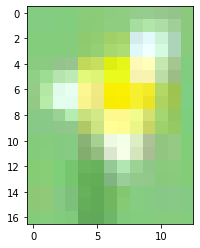

In [5]:
img = cv2.imread(df['path'][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [6]:
def path_to_array(df, column_out):
    img = cv2.imread(df['path'])
    df['image'] = img
    


In [7]:
images = []
shapes = []
flatened_images = []
for index, row in df.iterrows():
    img = cv2.imread(row.path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32))
    images.append(img)
    shapes.append(img.shape)
    flatened_images.append(img.flatten())

In [8]:
# df['image'] = images
df['shape'] = shapes

In [9]:
indexs = []
frames = []
obj = []


dict_info = {}
for index, row in df.iterrows():
#     print(os.path.basename(row.path[:-4]).split('_'))
    info = os.path.basename(row.path[:-4]).split('_')
    indexs.append(info[0])
    frames.append(info[1])
    obj.append(info[2])


In [10]:
df['index'] = indexs
df['frame'] = frames
df['obj_num'] = obj

In [11]:
df.head()

,path,shape,index,frame,obj_num
0,./data/objects_extracted/bicycles\45_0_0.png,"(32, 32, 3)",45,0,0
1,./data/objects_extracted/bicycles\45_0_1.png,"(32, 32, 3)",45,0,1
2,./data/objects_extracted/bicycles\45_0_10.png,"(32, 32, 3)",45,0,10
3,./data/objects_extracted/bicycles\45_0_11.png,"(32, 32, 3)",45,0,11
4,./data/objects_extracted/bicycles\45_0_12.png,"(32, 32, 3)",45,0,12


In [12]:
df = df[['index', 'frame','obj_num','path','shape']]

In [13]:
df = df.sort_values(by=['index','frame','obj_num'])

In [14]:
df.head(3)

,index,frame,obj_num,path,shape
0,45,0,0,./data/objects_extracted/bicycles\45_0_0.png,"(32, 32, 3)"
1,45,0,1,./data/objects_extracted/bicycles\45_0_1.png,"(32, 32, 3)"
2,45,0,10,./data/objects_extracted/bicycles\45_0_10.png,"(32, 32, 3)"


In [15]:
print(images[0])

[[[131 204 130]
  [131 204 130]
  [131 204 130]
  ...
  [144 198 132]
  [142 200 125]
  [141 201 124]]

 [[131 204 130]
  [131 204 130]
  [131 204 130]
  ...
  [146 200 133]
  [142 201 126]
  [141 201 124]]

 [[131 204 130]
  [131 204 130]
  [131 204 130]
  ...
  [150 203 137]
  [143 201 127]
  [141 201 124]]

 ...

 [[140 201 120]
  [140 201 120]
  [141 201 121]
  ...
  [134 202 133]
  [132 202 132]
  [132 202 132]]

 [[135 203 122]
  [135 203 122]
  [136 204 123]
  ...
  [134 204 128]
  [133 204 128]
  [133 204 128]]

 [[132 204 123]
  [132 204 123]
  [133 205 124]
  ...
  [134 204 126]
  [133 205 126]
  [133 205 126]]]


In [16]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [17]:
print(df.count())

index      586
frame      586
obj_num    586
path       586
shape      586
dtype: int64


In [18]:
flatened_images = np.array(flatened_images)
images = np.array(images)
X = np.reshape(images, (586, 32*32*3))
iris = load_iris()
XX = iris.data
print(X.shape)

(586, 3072)


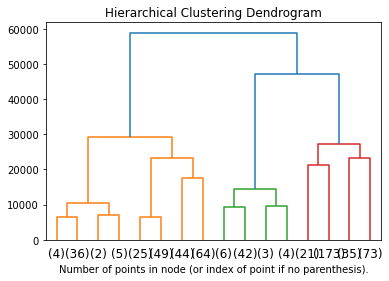

In [97]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
y_predict = model.fit_predict(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

(586,)


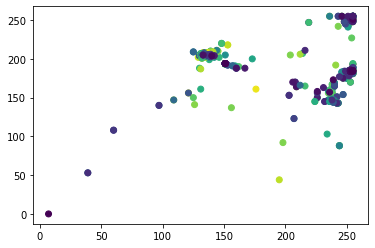

In [98]:
labels = model.labels_
print(labels.shape)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

In [101]:
clf = NearestCentroid()
clf.fit(X, y_predict)
print(clf.centroids_)

[[151. 194. 246. ... 253. 184. 226.]
 [  7.   0.   4. ... 128. 188. 194.]
 [255. 185. 223. ... 254. 184. 222.]
 ...
 [134. 203. 125. ... 135. 204. 126.]
 [133. 205. 126. ... 133. 205. 126.]
 [133. 208. 135. ... 132. 206. 125.]]
